# Project Model Overview

## Steps in Our Model

---
* Normalize data across seasons
* Find 10 most similar player seasons historically
* Rank and weight each of those 10 players season stats
* Look at 10 players following seasons stats
* Use weighted averages to predict current players next season
* Rinse and repeat for every player in 2017-18
---

# Cleaning Our NBA Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib along with seaborne plotting graphs in JN.
%matplotlib inline

In [2]:
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [3]:
# Using Pandas we read in per game data from csv folder.
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [4]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [5]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
1278,345,1998-99,50.0,36.0,27.3,3.4,7.4,0.465,1.2,2.8,...,2.5,3.0,0.831,0.3,2.5,2.9,1.5,1.0,0.2,10.5
5952,2137,2009-10,69.0,32.0,13.7,1.3,3.5,0.378,0.4,1.3,...,0.6,0.8,0.737,0.7,2.0,0.8,0.6,0.5,0.1,3.6
4045,1916,2005-06,33.0,30.0,7.6,0.6,1.4,0.426,0.0,0.1,...,0.2,0.3,0.556,0.6,1.0,0.4,0.2,0.3,0.3,1.4
4480,2564,2006-07,73.0,25.0,31.1,4.2,7.8,0.538,0.2,0.6,...,1.1,1.6,0.683,1.2,3.1,4.8,2.1,0.4,0.5,9.7
1828,201,2000-01,53.0,36.0,11.5,0.5,1.4,0.397,0.0,0.0,...,0.3,0.7,0.389,1.2,2.2,0.3,0.5,0.3,0.5,1.4
9403,203086,2016-17,74.0,25.0,16.5,2.0,5.1,0.386,1.0,2.9,...,0.5,0.5,0.875,0.4,2.8,1.0,0.5,0.2,0.4,5.4
3762,2039,2004-05,74.0,25.0,16.0,1.9,4.7,0.403,0.3,1.0,...,1.1,1.5,0.780,0.1,1.1,1.8,0.9,0.5,0.1,5.2
2836,2244,2002-03,8.0,23.0,12.1,2.1,5.0,0.425,0.5,1.0,...,0.9,0.9,1.000,1.0,1.0,0.8,1.0,1.0,0.0,5.6
6114,201988,2009-10,10.0,21.0,3.8,1.0,2.4,0.417,0.2,0.4,...,0.4,0.7,0.571,0.1,0.1,0.5,0.4,0.0,0.0,2.6
3575,935,2004-05,70.0,34.0,14.7,1.4,3.6,0.377,0.8,2.1,...,0.9,1.1,0.792,0.7,1.7,1.0,0.5,0.6,0.2,4.4


In [7]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [8]:
df_cleaned = df.dropna(how='all') # delete all rows in which each col contains NaN
# 2nd param: axis=1 -> delete all columns in which each row contains NaN

In [9]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [10]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std() * 3)

In [11]:
min_gp

np.float64(-22.712012335693153)

<Axes: >

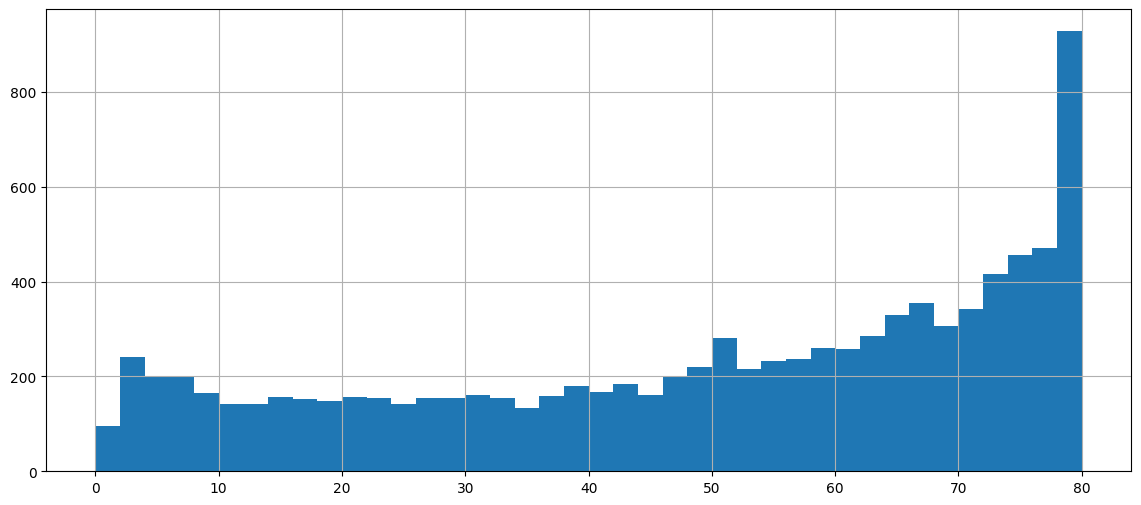

In [12]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])
# Histogram of games played in our data frame 

In [13]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [14]:
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x-y)

971


# Normalizing Data Across Seasons

In [15]:
season = df_filter['season_id'] == '2017-18'

In [16]:
df_2018 = df_filter[season]

In [17]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9743,1627824,2017-18,33.0,22.0,7.1,0.8,1.8,0.426,0.4,1.1,...,0.5,0.7,0.682,0.5,1.1,0.5,0.4,0.1,0.2,2.4
10088,202083,2017-18,63.0,31.0,33.8,4.5,11.1,0.406,2.4,6.4,...,1.3,1.6,0.822,0.4,2.7,2.7,1.3,1.2,0.3,12.7
9638,203991,2017-18,74.0,24.0,27.5,6.0,9.1,0.652,0.0,0.0,...,1.9,3.5,0.560,3.3,7.6,0.9,1.4,0.8,1.9,13.9
9869,1628424,2017-18,32.0,20.0,20.1,2.5,5.9,0.423,0.3,1.2,...,0.8,0.8,1.000,0.4,1.1,2.1,1.4,0.6,0.2,6.1
10074,1627820,2017-18,30.0,24.0,28.4,3.7,8.2,0.445,0.3,1.3,...,2.0,2.6,0.782,0.7,2.8,2.4,1.5,0.9,0.4,9.7
9651,2863,2017-18,19.0,38.0,8.0,0.7,2.1,0.333,0.2,0.9,...,0.2,0.2,0.750,0.3,0.6,0.5,0.3,0.1,0.1,1.7
9628,2546,2017-18,78.0,34.0,32.1,6.1,15.0,0.404,2.2,6.1,...,1.9,2.5,0.767,0.9,4.9,1.3,1.3,0.6,0.6,16.2
9941,1628462,2017-18,45.0,31.0,25.2,3.4,8.0,0.419,2.0,5.2,...,0.9,1.0,0.848,0.4,2.4,4.6,2.2,0.5,0.1,9.5
9886,1626204,2017-18,66.0,25.0,21.5,3.6,6.3,0.581,0.0,0.2,...,1.4,2.1,0.664,2.4,4.4,1.2,0.8,1.3,0.6,8.7
9774,1627883,2017-18,16.0,25.0,11.3,1.6,4.3,0.382,0.6,1.6,...,0.8,1.2,0.632,0.8,1.6,0.3,0.4,0.3,0.1,4.6


In [18]:
df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8364\3801605567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [19]:
df_2018.sort_values('pts_normalized', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_normalized
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [20]:
# We can find each player by his id in: https://www.nba.com/stats/player/ + [player_id]

In [21]:
def normalize(col):
    #df_2018['pts_normalized'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())
    #df_2018['fgm_normalized'] = (df_2018['fgm'] - df_2018['fgm'].min()) / (df_2018['fgm'].max() - df_2018['fgm'].min())
    #df_2018['ast_normalized'] = (df_2018['ast'] - df_2018['ast'].min()) / (df_2018['ast'].max() - df_2018['ast'].min())
    return (col - col.min()) / (col.max() - col.min())

In [22]:
normalize(df_2018['pts'])

9563     0.060201
9564     0.571906
9567     0.083612
9569     0.414716
9570     0.217391
           ...   
10098    0.130435
10099    0.541806
10100    0.468227
10101    0.163880
10102    0.023411
Name: pts, Length: 463, dtype: float64

In [23]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [24]:
normalize(df_2018['ast'])

9563     0.058252
9564     0.223301
9567     0.048544
9569     0.456311
9570     0.077670
           ...   
10098    0.077670
10099    0.291262
10100    0.213592
10101    0.155340
10102    0.009709
Name: ast, Length: 463, dtype: float64

In [25]:
cols_to_normalize = stats

In [29]:
def vorp(df): # Value Of Replacement Player
    for col_name in cols_to_normalize:
        df.loc[:, f"{col_name}_normalize"] = normalize(df[col_name])
    return df

In [33]:
df_2018_normalized = vorp(df_2018)

In [35]:
df_2018_normalized.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_normalize,fg3a_normalize,ftm_normalize,fta_normalize,oreb_normalize,dreb_normalize,ast_normalize,stl_normalize,tov_normalize,blk_normalize
9780,203516,2017-18,72.0,27.0,22.3,2.5,5.3,0.474,0.7,2.1,...,0.166667,0.21,0.149425,0.158416,0.196078,0.177570,0.097087,0.291667,0.16,0.115385
9646,201571,2017-18,75.0,30.0,23.5,3.3,7.2,0.452,1.5,3.6,...,0.357143,0.36,0.252874,0.247525,0.078431,0.140187,0.368932,0.291667,0.32,0.000000
10025,203524,2017-18,12.0,27.0,15.6,0.9,3.4,0.268,0.3,1.8,...,0.071429,0.18,0.034483,0.049505,0.156863,0.196262,0.174757,0.250000,0.16,0.038462
10041,201152,2017-18,81.0,30.0,32.2,5.2,10.7,0.487,0.7,2.2,...,0.166667,0.22,0.080460,0.108911,0.450980,0.355140,0.184466,0.708333,0.26,0.153846
9903,1626259,2017-18,15.0,25.0,8.4,0.9,1.9,0.464,0.5,1.4,...,0.119048,0.14,0.034483,0.029703,0.058824,0.046729,0.019417,0.041667,0.06,0.038462
9685,1627884,2017-18,20.0,21.0,12.3,1.1,2.7,0.396,0.2,0.9,...,0.047619,0.09,0.091954,0.118812,0.215686,0.065421,0.048544,0.083333,0.08,0.269231
10063,202684,2017-18,53.0,27.0,20.2,2.5,4.4,0.562,0.0,0.0,...,0.000000,0.00,0.091954,0.148515,0.470588,0.383178,0.058252,0.125000,0.14,0.115385
10005,1626220,2017-18,69.0,25.0,16.7,1.7,4.1,0.423,0.6,1.7,...,0.142857,0.17,0.103448,0.108911,0.078431,0.271028,0.135922,0.208333,0.16,0.076923
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,0.738095,0.86,0.781609,0.732673,0.156863,0.317757,0.640777,0.458333,0.56,0.153846
9615,203464,2017-18,64.0,27.0,9.0,0.9,2.0,0.433,0.2,0.8,...,0.047619,0.08,0.034483,0.069307,0.019608,0.074766,0.058252,0.166667,0.10,0.038462


In [37]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [40]:
df_new = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8364\556466379.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_new = df_filter.groupby(['season_id']).apply(vorp)


In [42]:
df_new.sample(10)

,,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_normalize,fg3a_normalize,ftm_normalize,fta_normalize,oreb_normalize,dreb_normalize,ast_normalize,stl_normalize,tov_normalize,blk_normalize
season_id,,,,,,,,,,,,,,,,,,,,,,
2014-15,8248,202343,2014-15,13.0,26.0,9.1,1.1,2.8,0.378,0.6,1.4,...,0.166667,0.172840,0.011364,0.029412,0.000000,0.050000,0.079208,0.130435,0.068182,0.000000
1998-99,971,363,1998-99,16.0,29.0,21.0,2.4,6.6,0.358,0.1,0.2,...,0.035714,0.028169,0.363636,0.352941,0.250000,0.206522,0.138889,0.333333,0.305556,0.205128
2004-05,3734,468,2004-05,69.0,35.0,21.8,2.3,5.3,0.438,1.0,2.4,...,0.344828,0.300000,0.103448,0.095238,0.102564,0.173077,0.208696,0.310345,0.217391,0.030303
2000-01,1931,3,2000-01,66.0,35.0,22.9,2.1,4.8,0.439,0.1,0.2,...,0.037037,0.027027,0.204819,0.183206,0.292683,0.304348,0.132653,0.416667,0.219512,0.054054
2008-09,5404,101139,2008-09,72.0,22.0,22.5,3.6,7.8,0.459,0.9,2.5,...,0.321429,0.357143,0.122222,0.112150,0.139535,0.147368,0.136364,0.214286,0.210526,0.068966
2014-15,8178,202718,2014-15,66.0,26.0,33.1,5.8,12.6,0.462,2.0,5.3,...,0.555556,0.654321,0.238636,0.284314,0.188679,0.380000,0.227723,0.434783,0.340909,0.103448
2018-19,10524,201937,2018-19,68.0,28.0,27.9,4.3,10.7,0.404,1.2,3.7,...,0.235294,0.280303,0.298969,0.309091,0.092593,0.272727,0.570093,0.590909,0.520000,0.037037
2001-02,2372,165,2001-02,61.0,39.0,22.5,3.2,6.9,0.464,0.0,0.0,...,0.000000,0.000000,0.101266,0.130841,0.320000,0.462366,0.092593,0.428571,0.384615,0.428571
2011-12,6924,101130,2011-12,59.0,26.0,15.6,1.8,4.4,0.419,0.0,0.0,...,0.000000,0.000000,0.072464,0.056604,0.272727,0.211538,0.068376,0.160000,0.128205,0.108108


# Player Distance Function

In [43]:
def calc_distance(u, v):
    distance = np.sqrt(np.sum((u - v)**2))
    return distance

In [44]:
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [45]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [46]:
df1.sample(5)

,player_id,player_name
443,203501,Tim Hardaway Jr.
286,202362,Lance Stephenson
78,203991,Clint Capela
144,202339,Eric Bledsoe
91,1627849,Daniel Ochefu


In [48]:
df2.sample(5)

,player_id,season_id,pts
1291,960,1998-99,6.8
9778,2749,2017-18,4.9
7016,2588,2011-12,6.6
6519,201188,2010-11,11.7
1674,1739,1999-00,11.6


In [49]:
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [50]:
df3.sample(5)

,player_id,player_name,season_id,pts
570,201147,Corey Brewer,2013-14,12.3
3232,203504,Trey Burke,2016-17,5.0
2691,200765,Rajon Rondo,2007-08,10.6
2807,201577,Robin Lopez,2011-12,5.4
307,1626246,Boban Marjanovic,2016-17,5.5


In [53]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [55]:
df_2019.sample(10)

,player_id,player_name,season_id,pts
1051,1626163,Frank Kaminsky,2018-19,8.6
2873,200752,Rudy Gay,2018-19,13.7
3202,203503,Tony Snell,2018-19,6.0
2535,1626181,Norman Powell,2018-19,8.6
1068,203914,Gary Harris,2018-19,12.9
1650,202322,John Wall,2018-19,20.7
1530,1626170,Jerian Grant,2018-19,4.2
1373,201935,James Harden,2018-19,36.1
2972,2733,Shaun Livingston,2018-19,4.0
969,202734,E'Twaun Moore,2018-19,11.9


In [57]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
steph_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [58]:
dame_ppg = dame_df.pts.tolist()[0]
steph_ppg = steph_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [64]:
calc_distance(dame_ppg, steph_ppg) # the order of params don't change the result

np.float64(1.5)

In [60]:
calc_distance(dame_ppg, rudy_ppg)

np.float64(9.9)

In [63]:
calc_distance(steph_ppg, rudy_ppg)

np.float64(11.4)

# Find Player Function

In [65]:
nba_stats = {
    'first_name': ['Jaylen','Jayson','Jrue','Derrick','Al'],
    'last_name': ['Brown','Tatum','Holiday','White','Horford'],
    'ppg': [28.2, 30.3, 14.1, 12.5, 7.8],
    'apg': [5.2, 6.1, 4.4, 4.5, 1.5],
    'rpg': [6.0, 8.4, 4.9, 3.7, 6.1]
}
celtics_df = pd.DataFrame(nba_stats, columns = ['first_name','last_name','ppg','apg','rpg'])

In [66]:
for row in celtics_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Jaylen Brown 28.2
Jayson Tatum 30.3
Jrue Holiday 14.1
Derrick White 12.5
Al Horford 7.8


In [68]:
# read in per game data form csv folder
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [69]:
df_example = dataframe.sample(10)

In [70]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2008-09 2063
2001-02 1504
1996-97 1037
2001-02 2229
2001-02 2058
2002-03 1888
2017-18 203998
1999-00 1983
2002-03 2407
2014-15 200769


In [75]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [77]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
5518,2063,2008-09,38.0,31.0,6.3,0.3,1.2,0.267,0.0,0.0,...,0.3,0.4,0.786,0.6,1.0,0.2,0.4,0.1,0.1,0.9
2298,1504,2001-02,77.0,26.0,28.8,4.0,9.4,0.428,0.0,0.1,...,3.2,4.0,0.795,3.8,7.9,1.6,2.1,0.6,0.2,11.2
397,1037,1996-97,53.0,33.0,14.9,1.5,2.6,0.561,0.0,0.0,...,0.5,0.7,0.676,1.1,2.1,0.3,1.0,0.2,1.3,3.4
2497,2229,2001-02,15.0,27.0,7.8,1.0,2.9,0.349,0.5,1.4,...,0.3,0.5,0.571,0.1,0.8,1.3,0.9,0.4,0.1,2.8
2476,2058,2001-02,59.0,26.0,11.0,1.1,2.5,0.452,0.0,0.0,...,0.6,0.9,0.648,1.5,1.2,0.7,0.4,0.3,0.2,2.8
2973,1888,2002-03,82.0,25.0,32.2,7.0,15.7,0.443,0.4,1.5,...,5.4,6.4,0.833,1.1,2.8,2.5,2.4,0.8,0.2,19.7
9619,203998,2017-18,12.0,22.0,8.9,0.8,2.6,0.290,0.3,1.4,...,0.4,0.5,0.833,0.6,1.3,0.3,0.3,0.3,0.3,2.2
1530,1983,1999-00,7.0,24.0,10.3,0.1,1.6,0.091,0.0,0.1,...,0.7,1.1,0.625,0.1,1.4,0.6,1.0,0.4,0.0,1.0
2824,2407,2002-03,20.0,21.0,14.5,1.5,3.2,0.476,0.2,0.3,...,0.8,1.5,0.552,1.3,1.6,0.8,1.1,0.4,0.3,4.0
8533,200769,2014-15,5.0,29.0,17.8,1.4,3.8,0.368,0.6,1.4,...,0.6,0.8,0.750,0.0,0.2,0.6,0.8,0.8,0.0,4.0


In [78]:
find_player(1504, '2001-02')

Pandas(Index=2298, player_id=1504, season_id='2001-02', gp=77.0, age=26.0, min=28.8, fgm=4.0, fga=9.4, fg_pct=0.428, fg3m=0.0, fg3a=0.1, fg3_pct=0.25, ftm=3.2, fta=4.0, ft_pct=0.795, oreb=3.8, dreb=7.9, ast=1.6, tov=2.1, stl=0.6, blk=0.2, pts=11.2)

In [79]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [81]:
dataframe.dtypes # show the type of each field in the DF

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [82]:
player = 2544 # Lebron James
season = '2012-13'

In [83]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calculating Player Similarity